In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp


CONFIGURACIÓN BÁSICA

In [2]:
# establecer un tema
sns.set_theme(style="darkgrid") # opciones: darkgrid, whitegrid, dark, white, ticks

# temas disponibles	
print(sns.axes_style().keys())

# contexto(tamaño y escala)
sns.set_context("paper")  # opciones: paper, notebook, talk, poster


dict_keys(['axes.facecolor', 'axes.edgecolor', 'axes.grid', 'axes.axisbelow', 'axes.labelcolor', 'figure.facecolor', 'grid.color', 'grid.linestyle', 'text.color', 'xtick.color', 'ytick.color', 'xtick.direction', 'ytick.direction', 'lines.solid_capstyle', 'patch.edgecolor', 'patch.force_edgecolor', 'image.cmap', 'font.family', 'font.sans-serif', 'xtick.bottom', 'xtick.top', 'ytick.left', 'ytick.right', 'axes.spines.left', 'axes.spines.bottom', 'axes.spines.right', 'axes.spines.top'])


DATASETS INCORPORADOS

In [3]:
print(sns.get_dataset_names())

# cargar datos
tips = sns.load_dataset('tips')

print(tips.head())
 


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


GRÁFICOS DE DISTRIBUCIÓN

Permiten visuaizar la distribución de un variable continua

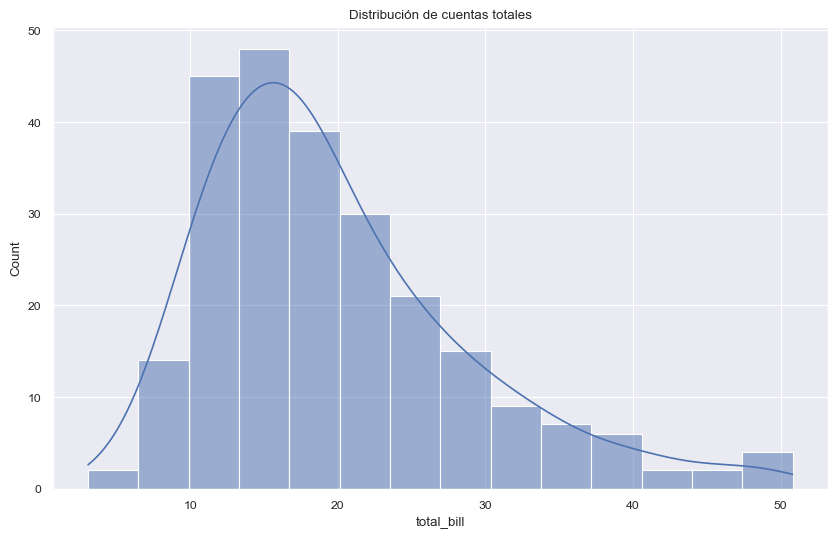

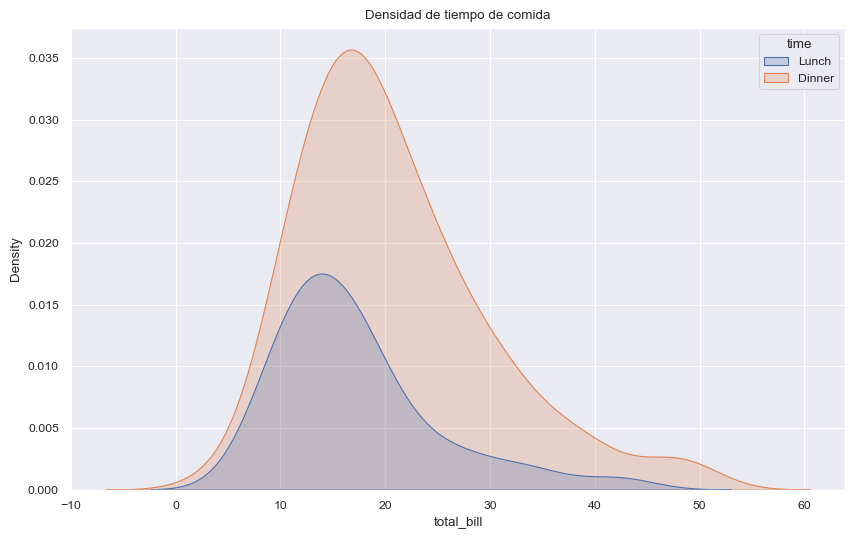

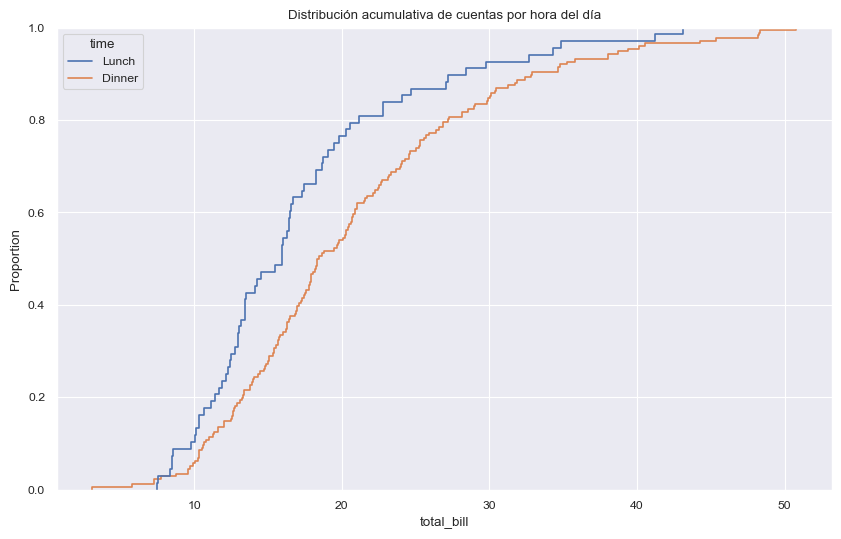

In [4]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=tips,x='total_bill', kde=True)
plt.title('Distribución de cuentas totales')
plt.show()

# Gráfico de Densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True)
plt.title('Densidad de tiempo de comida')
plt.show()

# Distribución acumulativa empirica (ECDF)
plt.figure(figsize=(10,6))
sns.ecdfplot(data=tips, x='total_bill', hue='time')
plt.title('Distribución acumulativa de cuentas por hora del día')
plt.show()


GRÁFICOS CATEGÓRICOS

Permiten visualizar la distribución de una variable continua en función de una o más variables categóricas

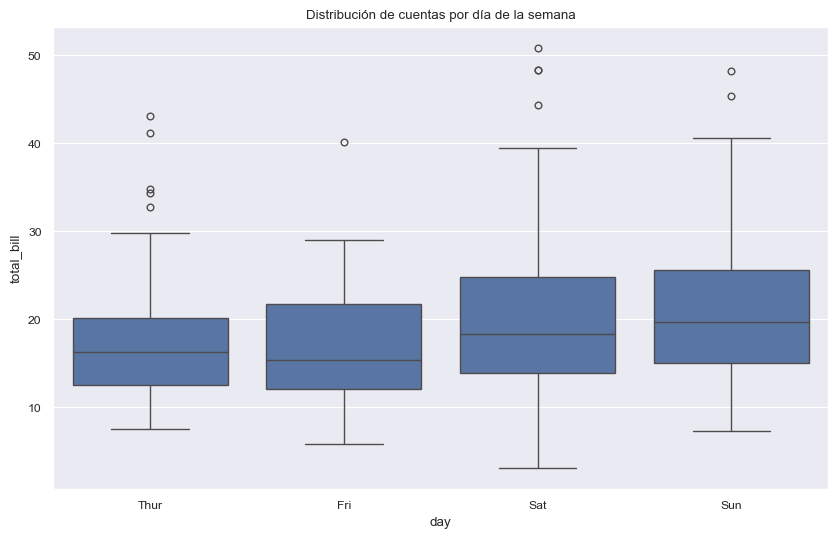

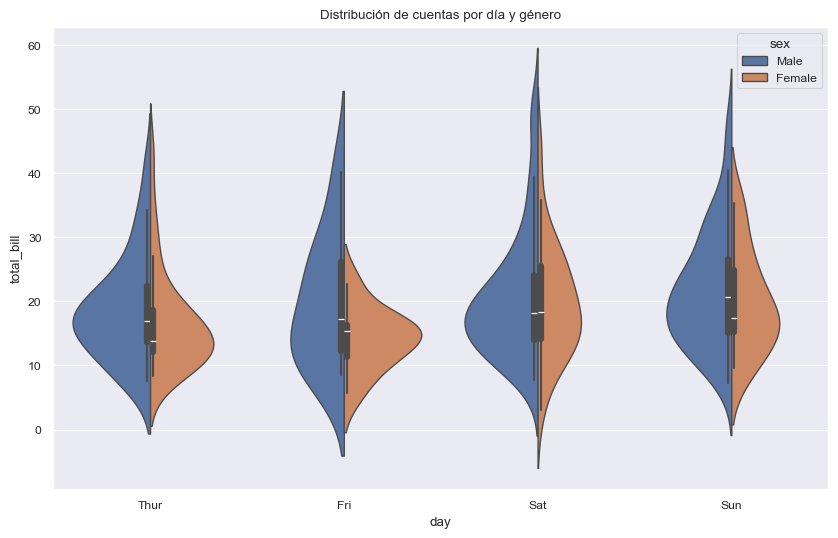

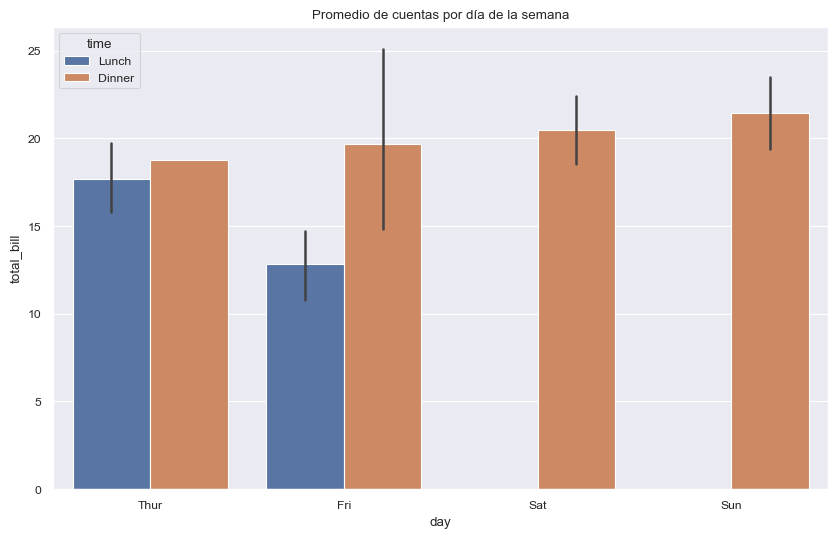

In [5]:
# Diagrama de caja (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Distribución de cuentas por día de la semana')
plt.show()

# Diagrama de violín
plt.figure(figsize=(10,6))
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True)
plt.title('Distribución de cuentas por día y género')
plt.show()

# Gráfico de barras(barplot)
plt.figure(figsize=(10,6))
sns.barplot(data=tips, x='day', y='total_bill', hue='time')
plt.title('Promedio de cuentas por día de la semana')
plt.show()

GRÁFICOS RELACIONALES

Permiten visualizar la relación entre dos o mas variables que son continuas

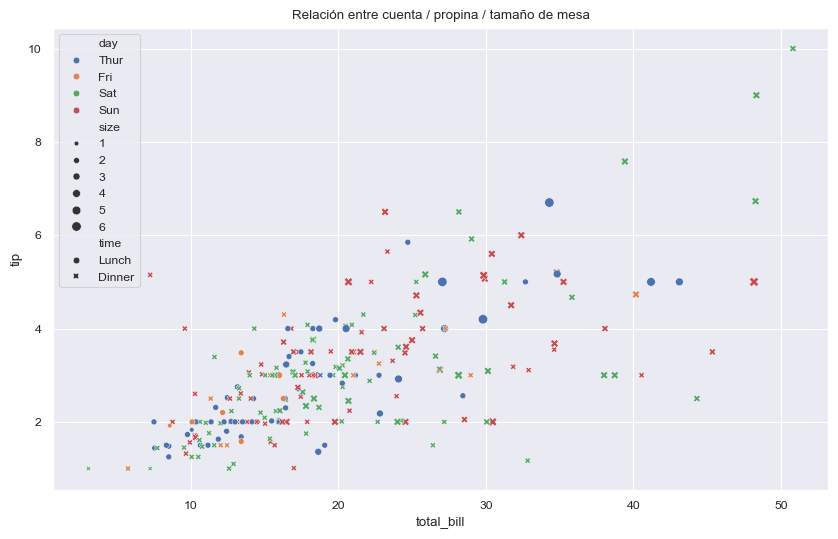

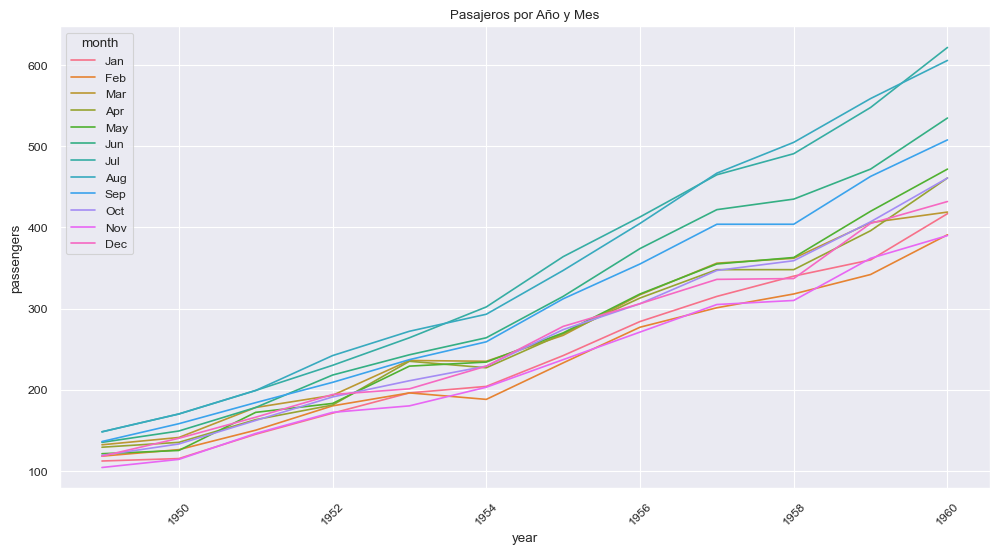

<function matplotlib.pyplot.show(close=None, block=None)>

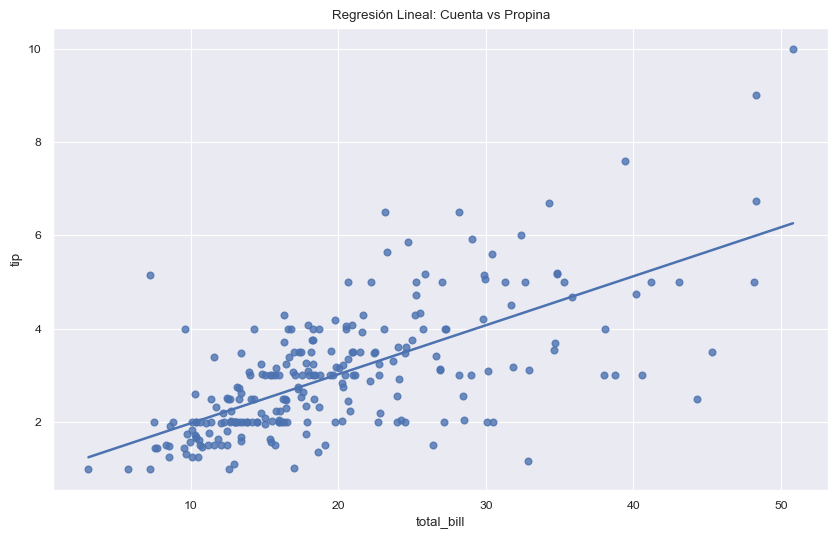

In [6]:
# gráfico de dispersión (scatterplot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time', size='size')
plt.title('Relación entre cuenta / propina / tamaño de mesa')
plt.show()

# gráfico de lineas (lineplot)
flights = sns.load_dataset('flights')
plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x='year', y='passengers', hue='month')
plt.title('Pasajeros por Año y Mes')
plt.xticks(rotation=45)
plt.show()

# gráfico de regresion (regplot)
plt.figure(figsize=(10,6))
sns.regplot(data=tips, x='total_bill', y='tip', ci=None)
plt.title('Regresión Lineal: Cuenta vs Propina')
plt.show

GRÁFICOS MATRICIALES

Permiten visualizar datos en forma de matriz, como correlaciones o datos tabulares

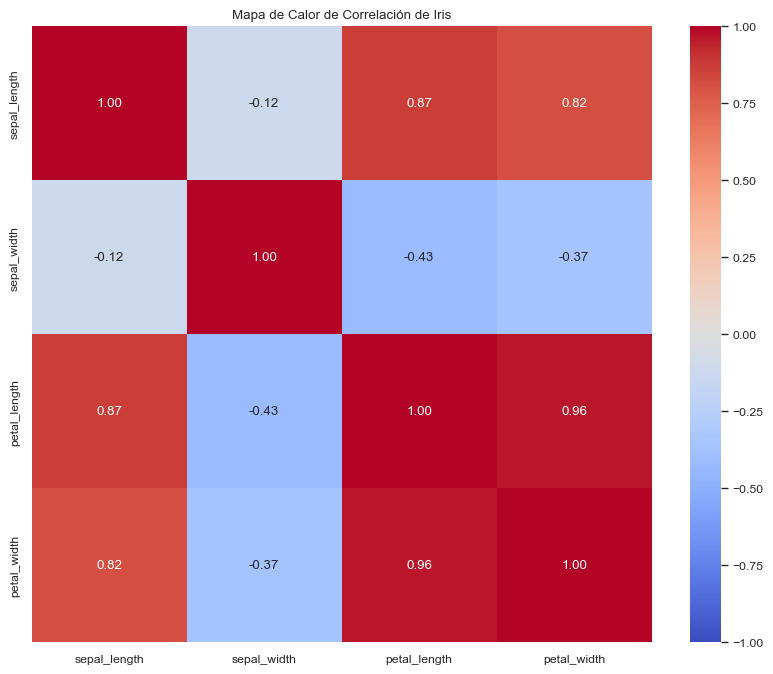

In [31]:
import scipy
iris = sns.load_dataset('iris')
corr = iris.drop('species', axis=1).corr()
# mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación de Iris')
plt.show()


GRÁFICOS MULTIPLOT

Seaborn ofrece varias clases para crear grids de múltiples gráficos que comparten ejes y leyendas

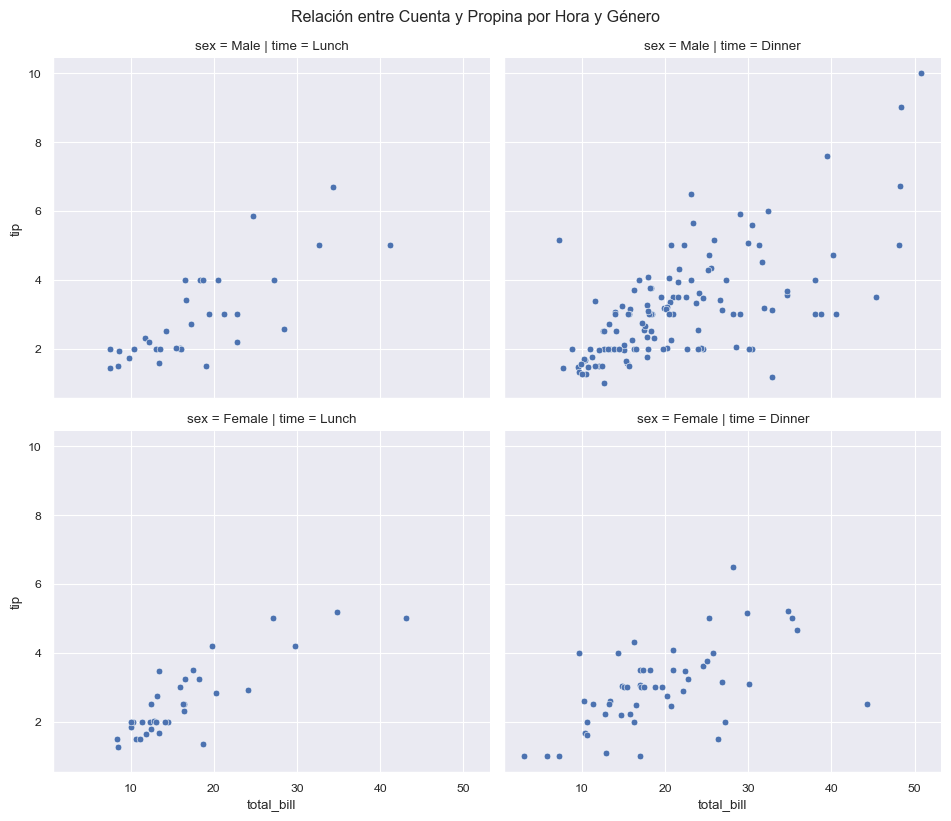

In [ ]:
# FaceTGrid (FacetGrid)
g = sns.FacetGrid(tips, col='time', row='sex', height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend
g.fig.suptitle('Relación entre Cuenta y Propina por Hora y Género', y=1.02)
plt.show()

# pairplot
